# Load and Explore the Dataset

In [57]:
# Add synthetic short reviews
short_reviews = [
    ("the movie was superb", "positive"),
    ("it was excellent", "positive"),
    ("a brilliant performance", "positive"),
    ("a waste of time", "negative"),
    ("the movie was terrible", "negative"),
    ("absolutely bad", "negative"),
    ("the movie was bad", "negative"),
]

import pandas as pd
df_extra = pd.DataFrame(short_reviews, columns=['review', 'sentiment'])

# Append to original dataset
df = pd.concat([df, df_extra], ignore_index=True)

import pandas as pd
df=pd.read_csv("IMDB Dataset.csv")
#print the first 5 rows
print(df.head())
#check the class distribution
print("\nLabel distribution:\n",df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Label distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


# Preprocessing the Text Data

In [58]:
import re
import string
import nltk
from nltk.corpus import stopwords
# Download stopwords if not already
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text=text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text
# Apply preprocessing to the review column
df['review'] = df['review'].apply(preprocess_text)

# Show cleaned sample
print(df.head(2))

    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production filming technique ...  positive


# Convert Text to Numbers (Vectorization)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')



# Fit and transform the text data
X = vectorizer.fit_transform(df['review']).toarray()


# Labels (convert 'positive' to 1, 'negative' to 0)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

print("Shape of X (features):", X.shape)
print("Sample of y (labels):", y[:5].values)


Shape of X (features): (50000, 5000)
Sample of y (labels): [1 1 1 0 1]


# Split the Dataset
##### Training set (to train the model)
##### Testing set (to evaluate how well it performs)

In [60]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 40000
Testing samples: 10000


# Train & Compare Models
## We'll train:

1> Logistic Regression

2> Random Forest

3> XGBoost

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)

print("Logistic Regression Accuracy:", round(lr_acc * 100, 2), "%")


c:\Users\saima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 87.1 %


In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", round(rf_acc * 100, 2), "%")


Random Forest Accuracy: 84.94 %


In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

print("XGBoost Accuracy:", round(xgb_acc * 100, 2), "%")


c:\Users\saima\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:00:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 86.01 %


# Evaluate with Confusion Matrix & Classification Report

Classification Report:

              precision    recall  f1-score   support

    Negative       0.87      0.84      0.86      4961
    Positive       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



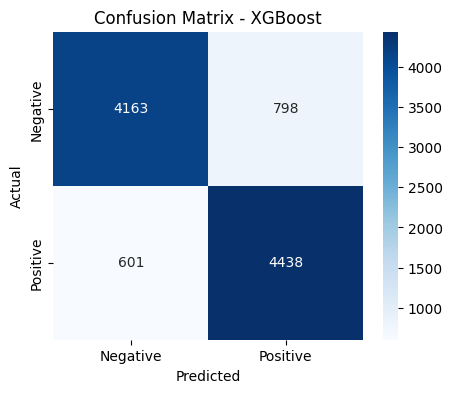

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, xgb_preds, target_names=["Negative", "Positive"]))

# Confusion matrix
cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


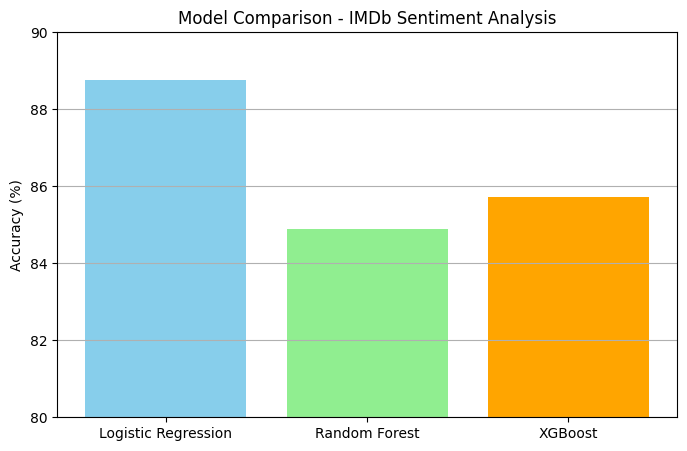

In [65]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [88.76, 84.88, 85.73]

# Plot
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison - IMDb Sentiment Analysis')
plt.ylim(80, 90)
plt.grid(axis='y')
plt.show()


In [66]:
import joblib

# Save the trained model and vectorizer
joblib.dump(xgb_model, 'xgb_imdb_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')



['vectorizer.pkl']